In [1]:
# Import tools to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Exploring the data (EDA)

In [2]:
# View file directory from competition
os.listdir('../march-madness-ml-project/MDataFiles_Stage2/')

['MNCAATourneyDetailedResults.csv',
 'MNCAATourneyCompactResults.csv',
 'MSeasons.csv',
 'MMasseyOrdinals_thruDay128.csv',
 'MRegularSeasonDetailedResults.csv',
 'MNCAATourneySlots.csv',
 'MGameCities.csv',
 'MConferenceTourneyGames.csv',
 'Cities.csv',
 'MRegularSeasonCompactResults.csv',
 'MNCAATourneySeedRoundSlots.csv',
 'MTeamConferences.csv',
 'MSampleSubmissionStage2.csv',
 'MTeamCoaches.csv',
 'Conferences.csv',
 'MTeams.csv',
 'MNCAATourneySeeds.csv',
 'MSecondaryTourneyTeams.csv',
 'MTeamSpellings.csv',
 'MSecondaryTourneyCompactResults.csv']

In [3]:
# View submission file to check format
final = pd.read_csv('../march-madness-ml-project/MDataFiles_Stage2/MSampleSubmissionStage2.csv')
final

,ID,Pred
0,2022_1103_1104,0.5
1,2022_1103_1112,0.5
2,2022_1103_1116,0.5
3,2022_1103_1120,0.5
4,2022_1103_1124,0.5
...,...,...
2273,2022_1458_1461,0.5
2274,2022_1458_1463,0.5
2275,2022_1460_1461,0.5
2276,2022_1460_1463,0.5


### Submission Format
* ID - YearOfGame_Team1_Team2
* Pred - Probability the team with the lower ID wins the game

In [4]:
# View regular season data
SeasonDetailedResults = pd.read_csv('../march-madness-ml-project/MDataFiles_Stage2/MRegularSeasonDetailedResults.csv')
SeasonDetailedResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102027,2022,132,1222,71,1272,53,N,0,25,58,...,10,8,14,9,25,15,15,5,4,19
102028,2022,132,1234,75,1345,66,N,0,26,61,...,20,11,17,17,31,13,17,4,2,22
102029,2022,132,1350,64,1172,62,N,0,22,51,...,27,15,17,4,26,12,9,4,2,16
102030,2022,132,1397,65,1401,50,N,0,22,56,...,19,14,18,10,24,6,12,6,0,14


In [5]:
SeasonDetailedResults.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000,...,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000,102032.000000
mean,2012.639329,71.198840,1287.624343,75.546446,1282.168359,63.569351,0.068498,26.237631,55.475723,7.226674,...,19.878146,12.078456,17.814568,10.781196,21.710463,11.413066,14.160018,5.999334,2.864748,19.050073
std,5.646483,35.562008,104.971707,11.043499,104.139832,10.885484,0.306104,4.683348,7.510948,3.095858,...,6.028759,5.352742,7.117282,4.223969,4.541602,3.726075,4.387330,2.752188,2.026197,5.470211
min,2003.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,10.000000,27.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,40.000000,1198.000000,68.000000,1191.000000,56.000000,0.000000,23.000000,50.000000,5.000000,...,16.000000,8.000000,13.000000,8.000000,19.000000,9.000000,11.000000,4.000000,1.000000,16.000000
50%,2013.000000,75.000000,1286.000000,75.000000,1281.000000,63.000000,0.000000,26.000000,55.000000,7.000000,...,19.000000,12.000000,17.000000,10.000000,22.000000,11.000000,14.000000,6.000000,3.000000,19.000000
75%,2017.000000,102.000000,1380.000000,83.000000,1373.000000,71.000000,0.000000,29.000000,60.000000,9.000000,...,24.000000,15.000000,22.000000,13.000000,25.000000,14.000000,17.000000,8.000000,4.000000,22.000000
max,2022.000000,132.000000,1472.000000,149.000000,1472.000000,144.000000,6.000000,57.000000,103.000000,26.000000,...,59.000000,42.000000,61.000000,36.000000,49.000000,31.000000,41.000000,22.000000,18.000000,45.000000


In [5]:
SeasonDetailedResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102032 entries, 0 to 102031
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   102032 non-null  int64 
 1   DayNum   102032 non-null  int64 
 2   WTeamID  102032 non-null  int64 
 3   WScore   102032 non-null  int64 
 4   LTeamID  102032 non-null  int64 
 5   LScore   102032 non-null  int64 
 6   WLoc     102032 non-null  object
 7   NumOT    102032 non-null  int64 
 8   WFGM     102032 non-null  int64 
 9   WFGA     102032 non-null  int64 
 10  WFGM3    102032 non-null  int64 
 11  WFGA3    102032 non-null  int64 
 12  WFTM     102032 non-null  int64 
 13  WFTA     102032 non-null  int64 
 14  WOR      102032 non-null  int64 
 15  WDR      102032 non-null  int64 
 16  WAst     102032 non-null  int64 
 17  WTO      102032 non-null  int64 
 18  WStl     102032 non-null  int64 
 19  WBlk     102032 non-null  int64 
 20  WPF      102032 non-null  int64 
 21  LFGM     1

In [6]:
# View tournament data
TourneyDetailedResults = pd.read_csv('../march-madness-ml-project/MDataFiles_Stage2/MNCAATourneyDetailedResults.csv')
TourneyDetailedResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,N,0,33,66,...,15,14,19,7,20,9,9,7,0,13
1177,2021,148,1417,51,1276,49,N,0,21,54,...,11,6,11,8,24,12,14,5,3,11
1178,2021,152,1124,78,1222,59,N,0,29,55,...,19,11,16,13,12,10,10,4,5,10
1179,2021,152,1211,93,1417,90,N,1,37,63,...,17,14,21,7,24,21,9,4,1,16


In [7]:
TourneyDetailedResults.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [8]:
TourneyDetailedResults.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,...,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,2011.650296,139.109229,1293.542760,75.234547,1294.587638,63.707028,0.071126,26.344623,55.462320,7.022862,...,20.502964,11.629128,16.617273,10.970364,21.368332,11.409822,12.171041,5.707875,2.939881,18.853514
std,5.274224,4.234734,102.884842,10.724755,105.945614,10.305693,0.294045,4.751158,7.225518,2.965677,...,5.826098,5.114416,6.609636,4.215384,4.463864,3.641061,3.920983,2.670336,2.045817,4.232007
min,2003.000000,134.000000,1101.000000,47.000000,1101.000000,29.000000,0.000000,13.000000,34.000000,0.000000,...,5.000000,0.000000,2.000000,1.000000,8.000000,2.000000,3.000000,0.000000,0.000000,7.000000
25%,2007.000000,136.000000,1211.000000,68.000000,1210.000000,57.000000,0.000000,23.000000,51.000000,5.000000,...,16.000000,8.000000,12.000000,8.000000,18.000000,9.000000,9.000000,4.000000,1.000000,16.000000
50%,2012.000000,137.000000,1277.000000,75.000000,1295.000000,63.000000,0.000000,26.000000,55.000000,7.000000,...,20.000000,11.000000,16.000000,11.000000,21.000000,11.000000,12.000000,6.000000,3.000000,19.000000
75%,2016.000000,139.000000,1393.000000,82.000000,1393.000000,71.000000,0.000000,29.000000,60.000000,9.000000,...,24.000000,15.000000,21.000000,14.000000,24.000000,14.000000,15.000000,7.000000,4.000000,22.000000
max,2021.000000,154.000000,1463.000000,121.000000,1463.000000,105.000000,2.000000,44.000000,84.000000,18.000000,...,42.000000,31.000000,39.000000,29.000000,42.000000,23.000000,27.000000,19.000000,13.000000,33.000000


#### There appeares to be alot more regular season data than tournament data (because there aren't as many tournament games as reg season)
This can be shown by comparing some features

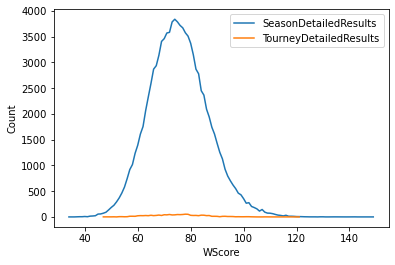

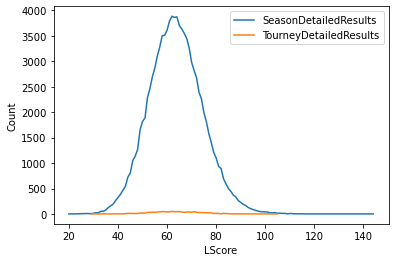

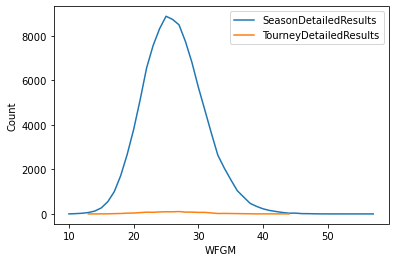

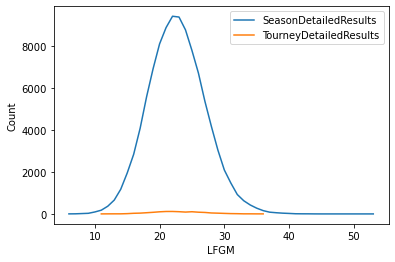

In [9]:
# The difference in number of reg season and tournament games makes it difficult to identify differences in data
features = ['WScore', 'LScore','WFGM', 'LFGM']

for feature in features:
    SeasonDetailedResults[feature].value_counts().sort_index().plot()
    TourneyDetailedResults[feature].value_counts().sort_index().plot()
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['SeasonDetailedResults','TourneyDetailedResults'])
    plt.show()

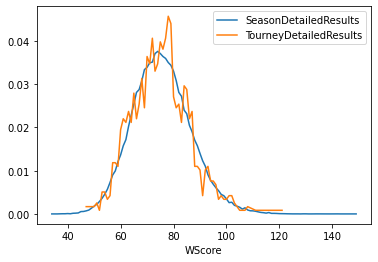

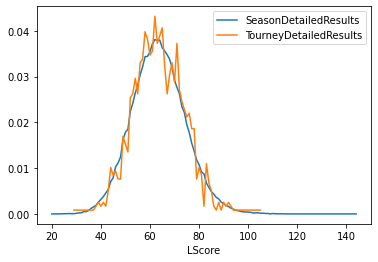

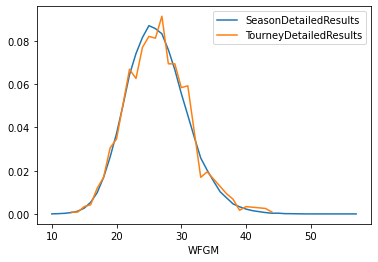

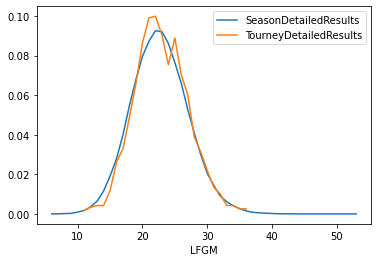

In [10]:
# Adjust data sets to show a better comparison
SeasonDetailedResults_count = SeasonDetailedResults.shape[0]
TourneyDetailedResults_count = TourneyDetailedResults.shape[0]

for feature in features:
    (SeasonDetailedResults[feature].value_counts().sort_index()/SeasonDetailedResults_count).plot()
    (TourneyDetailedResults[feature].value_counts().sort_index()/TourneyDetailedResults_count).plot()
    plt.xlabel(feature)
    plt.legend(['SeasonDetailedResults', 'TourneyDetailedResults'])
    plt.show()

Regular season data is usually of little significance for predicting tournament/championship outcomes. However, teams with good regular seasons tend to do well in tournaments/championships, so we won't require a great deal of data from the regular season.

In [11]:
# Public ranking of each team, collected through different ranking methodolgies
MMasseyOrdinals = pd.read_csv('../march-madness-ml-project/MDataFiles_Stage2/MMasseyOrdinals_thruDay128.csv')
MMasseyOrdinals

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260
...,...,...,...,...,...
4601845,2022,128,WOL,1468,162
4601846,2022,128,WOL,1469,252
4601847,2022,128,WOL,1470,225
4601848,2022,128,WOL,1471,257


In [12]:
# Taking a look at coaches of teams from different years, this could be a big factor in winning games
TeamCoaches = pd.read_csv('../march-madness-ml-project/MDataFiles_Stage2/MTeamCoaches.csv')
TeamCoaches

,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson
3,1985,1106,0,154,james_oliver
4,1985,1108,0,154,davey_whitney
...,...,...,...,...,...
12426,2022,1468,0,154,scott_davenport
12427,2022,1469,0,154,jon_judkins
12428,2022,1470,0,154,billy_gillispie
12429,2022,1471,0,154,eric_olen


In [13]:
# Create a column in TourneyDetailedResults to identify if the winning team ID (WTeamID) value is greater than the losing team ID (LTeamID) value.

for feature in ['WLoc', 'NumOT']: # Won't be using these features
    del TourneyDetailedResults[feature]
    
TourneyDetailedResults['TeamIDcompare'] = TourneyDetailedResults['WTeamID'] < TourneyDetailedResults['LTeamID']
TourneyDetailedResults['TeamIDcompare'] = TourneyDetailedResults['TeamIDcompare'].astype(str).map({'True':1, 'False':0})
TourneyDetailedResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WFGM,WFGA,WFGM3,WFGA3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,TeamIDcompare
0,2003,134,1421,92,1411,84,32,69,11,29,...,14,31,17,28,16,15,5,0,22,0
1,2003,136,1112,80,1436,51,31,66,7,23,...,7,7,8,26,12,17,10,3,15,1
2,2003,136,1113,84,1272,71,31,59,6,14,...,14,21,20,22,11,12,2,5,18,1
3,2003,136,1141,79,1166,73,29,53,3,7,...,12,17,14,17,20,21,6,6,21,1
4,2003,136,1143,76,1301,74,27,64,7,20,...,15,20,10,26,16,14,5,8,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,33,66,7,21,...,14,19,7,20,9,9,7,0,13,1
1177,2021,148,1417,51,1276,49,21,54,3,13,...,6,11,8,24,12,14,5,3,11,0
1178,2021,152,1124,78,1222,59,29,55,11,24,...,11,16,13,12,10,10,4,5,10,1
1179,2021,152,1211,93,1417,90,37,63,7,21,...,14,21,7,24,21,9,4,1,16,1


In [14]:
# Create a DataFrame with TeamIDcompare = 1
df1 = TourneyDetailedResults[TourneyDetailedResults['TeamIDcompare'] == 1]

# Create a DataFrame with TeamIDcompare = 0
df2 = TourneyDetailedResults[TourneyDetailedResults['TeamIDcompare'] == 0]

We want to change the 'W' and 'L' in each column name to 'A' or 'B' based on the following criteria:
* For the team with the lower TeamID, change to 'A'.
* For the team with the higher TeamID, change to 'B'.

In [15]:
# For df1 (losing team have higher ID value)
new_feature_list1 = []
for col in df1.columns.values.tolist()[2:]:
    if col[0] == 'W':
        col = str(col).replace('W', 'A', 1)
    if col[0] == 'L':
        col = str(col).replace('L', 'B', 1)
    new_feature_list1.append(col)
df1.columns = ['Season', 'DayNum'] + new_feature_list1

# For df2 (winning team have higher ID value)
new_feature_list2 = []
for col in df2.columns.values.tolist()[2:]:
    if col[0] == 'W':
        col = str(col).replace('W', 'B', 1)
    if col[0] == 'L':
        col = str(col).replace('L', 'A', 1)
    new_feature_list2.append(col)
df2.columns = ['Season', 'DayNum'] + new_feature_list2

# Combine the two DataFrames back together 
df = pd.concat([df1, df2])

# Add a column for score difference, and one to identify if Team A win
df['ScoreDiff'] = df['AScore'] - df['BScore']
df['A_win'] = df['ScoreDiff'] > 0 
df['A_win'] = df['A_win'].astype(str).map({'True':1, 'False': 0}) # Convert boolean to 1 or 0

# Delete 'TeamIDcompare' column
for feature in ['TeamIDcompare']:
    del df[feature]
df

,Season,DayNum,ATeamID,AScore,BTeamID,BScore,AFGM,AFGA,AFGM3,AFGA3,...,BFTA,BOR,BDR,BAst,BTO,BStl,BBlk,BPF,ScoreDiff,A_win
1,2003,136,1112,80,1436,51,31,66,7,23,...,7,8,26,12,17,10,3,15,29,1
2,2003,136,1113,84,1272,71,31,59,6,14,...,21,20,22,11,12,2,5,18,13,1
3,2003,136,1141,79,1166,73,29,53,3,7,...,17,14,17,20,21,6,6,21,6,1
4,2003,136,1143,76,1301,74,27,64,7,20,...,20,10,26,16,14,5,8,19,2,1
8,2003,136,1228,65,1443,60,24,56,5,14,...,13,17,18,10,14,6,5,16,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,2021,146,1199,58,1276,76,24,60,5,20,...,23,9,25,19,7,4,3,10,-18,0
1172,2021,146,1104,78,1417,88,30,69,7,28,...,25,12,26,12,7,8,7,21,-10,0
1173,2021,146,1332,68,1425,82,26,69,5,21,...,12,8,20,15,13,5,4,11,-14,0
1174,2021,147,1116,72,1124,81,26,54,3,11,...,17,10,16,17,8,9,5,21,-9,0


In [16]:
# Create a Team A DataFrame and a Team B DataFrame
df['ScoreDiff_B'] = -df['ScoreDiff'] # So the score difference is absolute when they lose
A_cols = ['Season', 'ATeamID', 'AFGM', 'AFGA', 'AFGM3', 'AFGA3', 'AFTM', 'AFTA', 'AOR', 'ADR', 'AAst', 'ATO',
       'AStl', 'ABlk', 'APF', 'ScoreDiff']
B_cols = ['Season', 'BTeamID','BFGM', 'BFGA', 'BFGM3', 'BFGA3', 'BFTM', 'BFTA','BOR', 'BDR', 'BAst', 'BTO', 
          'BStl', 'BBlk', 'BPF', 'ScoreDiff_B']
A_df = df[A_cols]
B_df = df[B_cols]
new_cols = []
# Set up a function to remove 'A' or 'B' from the column name
for col in A_df.columns.values.tolist():
    if col[0] == 'A':
        col = col[1:]
    new_cols.append(col)
A_df.columns = new_cols
B_df.columns = new_cols

In [17]:
# Combine the two Dataframes
tournament_season_df = pd.concat([A_df, B_df])
tournament_season_df

,Season,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,ScoreDiff
1,2003,1112,31,66,7,23,11,14,11,36,22,16,10,7,8,29
2,2003,1113,31,59,6,14,16,22,10,27,18,9,7,4,19,13
3,2003,1141,29,53,3,7,18,25,11,20,15,18,13,1,19,6
4,2003,1143,27,64,7,20,15,23,18,20,17,13,8,2,14,2
8,2003,1228,24,56,5,14,12,14,15,23,15,14,11,4,14,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,2021,1276,29,59,3,11,15,23,9,25,19,7,4,3,10,18
1172,2021,1417,29,74,10,29,20,25,12,26,12,7,8,7,21,10
1173,2021,1425,31,54,10,17,10,12,8,20,15,13,5,4,11,14
1174,2021,1124,30,62,8,15,13,17,10,16,17,8,9,5,21,9


Construct a train and test dataset - Although, the test dataset will not have existed before the tournament begun, so the win column will not be used.

In [18]:
train = df.copy()
train = train[['Season', 'ATeamID', 'BTeamID', 'A_win']]
train

,Season,ATeamID,BTeamID,A_win
1,2003,1112,1436,1
2,2003,1113,1272,1
3,2003,1141,1166,1
4,2003,1143,1301,1
8,2003,1228,1443,1
...,...,...,...,...
1171,2021,1199,1276,0
1172,2021,1104,1417,0
1173,2021,1332,1425,0
1174,2021,1116,1124,0


In [19]:
test = pd.read_csv('../march-madness-ml-project/MDataFiles_Stage2/MSampleSubmissionStage2.csv')
# Splitting the ID column by the underscores, then taking the 0 index
test['Season'] = test['ID'].apply(lambda x:x.split('_')[0])
test['ATeamID'] = test['ID'].apply(lambda x:x.split('_')[1])
test['BTeamID'] = test['ID'].apply(lambda x:x.split('_')[2])
del test['ID']
test = test.reindex(columns=['Season', 'ATeamID', 'BTeamID','Pred'])
test[['Season', 'ATeamID', 'BTeamID']] = test[['Season', 'ATeamID', 'BTeamID']].astype(int)
del test['Pred']
test

,Season,ATeamID,BTeamID
0,2022,1103,1104
1,2022,1103,1112
2,2022,1103,1116
3,2022,1103,1120
4,2022,1103,1124
...,...,...,...
2273,2022,1458,1461
2274,2022,1458,1463
2275,2022,1460,1461
2276,2022,1460,1463


Add in tournament features for each team

In [20]:
tournament_season_df.columns

Index(['Season', 'TeamID', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR',
       'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'ScoreDiff'],
      dtype='object')

In [21]:
# Convert Attempted and Made columns to percentages to reduce column count
tournament_season_df['shot_percentage'] = tournament_season_df['FGM'] / tournament_season_df['FGA']
tournament_season_df['3point_percentage'] = tournament_season_df['FGM3'] / tournament_season_df['FGA3']

# Convert rebound columns to 'Total rebounds', 'Offensive rebound percentage' & 'Defensive rebound percentage'
tournament_season_df['all_rebounds'] = tournament_season_df['OR'] + tournament_season_df['DR']
tournament_season_df['off_rebounds_percentage'] = tournament_season_df['OR'] / tournament_season_df['all_rebounds']
tournament_season_df['def_rebounds_percentage'] = tournament_season_df['DR'] / tournament_season_df['all_rebounds']

# Change Assist and turnover columns into a percentage
tournament_season_df['ast_to_percentage'] = tournament_season_df['TO'] / tournament_season_df['Ast']

# Combine defensive stats to give one total value
tournament_season_df['def_data'] = tournament_season_df['Stl'] + tournament_season_df['Blk']

# Remove the old columns used to create the new columns
old_cols = ['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'PF', 'OR', 'DR', 'Ast', 'Stl', 'Blk']
for col in old_cols:
    del tournament_season_df[col]

tournament_season_df

,Season,TeamID,TO,ScoreDiff,shot_percentage,3point_percentage,all_rebounds,off_rebounds_percentage,def_rebounds_percentage,ast_to_percentage,def_data
1,2003,1112,16,29,0.469697,0.304348,47,0.234043,0.765957,0.727273,17
2,2003,1113,9,13,0.525424,0.428571,37,0.270270,0.729730,0.500000,11
3,2003,1141,18,6,0.547170,0.428571,31,0.354839,0.645161,1.200000,14
4,2003,1143,13,2,0.421875,0.350000,38,0.473684,0.526316,0.764706,10
8,2003,1228,14,5,0.428571,0.357143,38,0.394737,0.605263,0.933333,15
...,...,...,...,...,...,...,...,...,...,...,...
1171,2021,1276,7,18,0.491525,0.272727,34,0.264706,0.735294,0.368421,7
1172,2021,1417,7,10,0.391892,0.344828,38,0.315789,0.684211,0.583333,15
1173,2021,1425,13,14,0.574074,0.588235,28,0.285714,0.714286,0.866667,9
1174,2021,1124,8,9,0.483871,0.533333,26,0.384615,0.615385,0.470588,14


In [22]:
# Add a column for who won each game by using score difference
def judge_win(x):
    if x > 0:
        return 1
    else:
        return 0
# Apply the function to each value in the column
tournament_season_df['win'] = tournament_season_df['ScoreDiff'].apply(lambda x:judge_win(x))
tournament_season_df

,Season,TeamID,TO,ScoreDiff,shot_percentage,3point_percentage,all_rebounds,off_rebounds_percentage,def_rebounds_percentage,ast_to_percentage,def_data,win
1,2003,1112,16,29,0.469697,0.304348,47,0.234043,0.765957,0.727273,17,1
2,2003,1113,9,13,0.525424,0.428571,37,0.270270,0.729730,0.500000,11,1
3,2003,1141,18,6,0.547170,0.428571,31,0.354839,0.645161,1.200000,14,1
4,2003,1143,13,2,0.421875,0.350000,38,0.473684,0.526316,0.764706,10,1
8,2003,1228,14,5,0.428571,0.357143,38,0.394737,0.605263,0.933333,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1171,2021,1276,7,18,0.491525,0.272727,34,0.264706,0.735294,0.368421,7,1
1172,2021,1417,7,10,0.391892,0.344828,38,0.315789,0.684211,0.583333,15,1
1173,2021,1425,13,14,0.574074,0.588235,28,0.285714,0.714286,0.866667,9,1
1174,2021,1124,8,9,0.483871,0.533333,26,0.384615,0.615385,0.470588,14,1


In [23]:
tournament_season_df['tournament_win_scorediff_mean'] = tournament_season_df[tournament_season_df['win'] == 1].\
groupby(['Season', 'TeamID'])['ScoreDiff'].transform('mean')
tournament_season_df['tournament_win_sum'] = tournament_season_df.groupby(['Season', 'TeamID'])['win'].transform(sum)
tournament_start_fea_df = tournament_season_df[['Season', 'TeamID', 'tournament_win_scorediff_mean', 'tournament_win_sum']]
tournament_start_fea_df.drop_duplicates(['Season', 'TeamID'], inplace=True)
tournament_start_fea_df

/var/folders/fg/kzc3cyh11rxbcd35lypwh1_80000gn/T/ipykernel_5176/2422965230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tournament_start_fea_df.drop_duplicates(['Season', 'TeamID'], inplace=True)


,Season,TeamID,tournament_win_scorediff_mean,tournament_win_sum
1,2003,1112,15.666667,3
2,2003,1113,13.000000,1
3,2003,1141,6.000000,1
4,2003,1143,2.000000,1
8,2003,1228,5.000000,1
...,...,...,...,...
1166,2021,1331,7.000000,2
1176,2021,1425,19.800000,3
1179,2021,1417,19.800000,5
880,2016,1437,20.666667,6


Create a function that runs all of the above:

* Deletes unnecessary columns.
* Create a column to identify if the winning team ID (WTeamID) value is greater than the losing team ID (LTeamID) value.
* Identifies which teamID value is higher and splits into two dataframes based on the higher teamID.
* Changes the 'W' to 'A' if teamID was higher or 'B' if lower. Changes the 'L' to 'B' if teamID was higher or 'A' if lower.
* Recombines the two data frames with the new column titles
* Creates a score difference column.
* Changes the rest of the column titles to use 'A' and 'B' instead of 'W' and 'L'
* Gets rid of 'B' team values to display only 'A' team values.
* Creates a win column using the score difference.

In [24]:
def generate_basicdata(df):  
    
    for fea in ['WLoc', 'NumOT']:
        del df[fea] # Deletes unnecessary columns
    df['TeamIDcoompare'] = df['WTeamID'] < df['LTeamID'] # Create a column to identify if the winning team ID (WTeamID) value is greater than the losing team ID (LTeamID) value.
    df['TeamIDcoompare'] = df['TeamIDcoompare'].astype(str).map({'True':1, 'False':0})
    df1 = df[df['TeamIDcoompare'] == 1] # Split into two dataframes based on who has the higher TeamID
    df2 = df[df['TeamIDcoompare'] == 0]

    # Change the 'W' to 'A' if teamID was higher or 'B' if lower. Changes the 'L' to 'B' if teamID was higher or 'A' if lower.
    new_fea_list1 = []
    for col in df1.columns.values.tolist()[2:]:
        if col[0] == 'W':
            col = str(col).replace('W', 'A', 1)
        if col[0] == 'L':
            col = str(col).replace('L', 'B', 1)
        new_fea_list1.append(col)
    df1.columns = ['Season', 'DayNum'] + new_fea_list1
    new_fea_list2 = []
    for col in df2.columns.values.tolist()[2:]:
        if col[0] == 'W':
            col = str(col).replace('W', 'B', 1)
        if col[0] == 'L':
            col = str(col).replace('L', 'A', 1)
        new_fea_list2.append(col)
    df2.columns = ['Season', 'DayNum'] + new_fea_list2
    df = pd.concat([df1, df2]) # Recombines the dataframes with 'A' and 'B' instead of 'W' and 'L'
    df['ScoreDiff'] = df['AScore'] - df['BScore'] # Create a score difference column
    df['A_win'] = df['ScoreDiff'] > 0
    df['A_win'] = df['A_win'].astype(str).map({'True':1, 'False':0})
    for fea in ['TeamIDcoompare']:
        del df[fea]
    df['ScoreDiff_B'] = -df['ScoreDiff']
    # Change the rest of the column titles to use 'A' and 'B' instead of 'W' and 'L'
    A_cols = ['Season', 'ATeamID', 'AFGM', 'AFGA', 'AFGM3', 'AFGA3', 'AFTM', 'AFTA', 'AOR', 'ADR', 'AAst', 'ATO',
           'AStl', 'ABlk', 'APF', 'ScoreDiff']
    B_cols = ['Season', 'BTeamID','BFGM', 'BFGA', 'BFGM3', 'BFGA3', 'BFTM', 'BFTA','BOR', 'BDR', 'BAst', 'BTO', 
              'BStl', 'BBlk', 'BPF', 'ScoreDiff_B']
    A_df = df[A_cols]
    B_df = df[B_cols]
    new_cols = []
    for col in A_df.columns.values.tolist():
        if col[0] == 'A':
            col = col[1:]
        new_cols.append(col)
    A_df.columns = new_cols
    B_df.columns = new_cols
    df = pd.concat([A_df, B_df])# Get rid of 'B' team values to display only 'A' team values.
    # Create a win column using score difference
    def judge_win(x):
        if x > 0:
            return 1
        else:
            return 0
    df['win'] = df['ScoreDiff'].apply(lambda x:judge_win(x))
    
    return df

# Apply the function to SeasonDetailedResults
SeasonDetailedResults = generate_basicdata(SeasonDetailedResults)
SeasonDetailedResults

,Season,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,ScoreDiff,win
0,2003,1104,27,58,3,14,11,18,14,24,13,23,7,1,22,6,1
1,2003,1272,26,62,8,20,10,19,15,28,16,13,4,4,18,7,1
2,2003,1266,24,58,8,18,17,29,17,26,15,10,5,2,25,12,1
3,2003,1296,18,38,3,9,17,31,6,19,11,12,14,2,18,6,1
6,2003,1161,23,55,2,8,32,39,13,18,14,17,11,1,25,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102024,2022,1437,19,57,8,32,8,12,9,29,9,8,6,0,10,6,1
102025,2022,1439,32,64,10,22,8,12,11,23,18,8,7,0,18,15,1
102026,2022,1463,26,54,9,21,6,12,5,27,9,7,3,4,13,6,1
102029,2022,1350,22,51,5,16,15,18,4,29,8,11,5,0,17,2,1


In [25]:
# Repeat process 2 inputs above but for SeasonDetailedResults and for the losing games too

SeasonDetailedResults['season_win_scorediff_mean'] = SeasonDetailedResults[SeasonDetailedResults['win'] == 1].\
groupby(['Season', 'TeamID'])['ScoreDiff'].transform('mean')
SeasonDetailedResults['season_lose_scorediff_mean'] = SeasonDetailedResults[SeasonDetailedResults['win'] == 0].\
groupby(['Season', 'TeamID'])['ScoreDiff'].transform('mean')

SeasonDetailedResults['season_win_sum'] = SeasonDetailedResults.groupby(['Season', 'TeamID'])['win'].transform(sum)
SeasonDetailedResults['season_game_sum'] = SeasonDetailedResults.groupby(['Season', 'TeamID'])['TeamID'].transform('count')
SeasonDetailedResults['season_win_ratio'] = SeasonDetailedResults['season_win_sum'] / SeasonDetailedResults['season_game_sum']

Season_start_fea_df = SeasonDetailedResults[['Season', 'TeamID', 'season_win_sum', 'season_win_ratio', 'season_game_sum', 'season_win_scorediff_mean', 'season_lose_scorediff_mean']]
Season_start_fea_df.drop_duplicates(['Season', 'TeamID'], inplace=True)
Season_start_fea_df

/var/folders/fg/kzc3cyh11rxbcd35lypwh1_80000gn/T/ipykernel_5176/1283223800.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Season_start_fea_df.drop_duplicates(['Season', 'TeamID'], inplace=True)


,Season,TeamID,season_win_sum,season_win_ratio,season_game_sum,season_win_scorediff_mean,season_lose_scorediff_mean
0,2003,1104,17,0.607143,28,13.176471,-7.166667
1,2003,1272,23,0.793103,29,12.695652,-10.000000
2,2003,1266,23,0.821429,28,14.826087,-8.066667
3,2003,1296,17,0.548387,31,10.176471,-11.000000
6,2003,1161,17,0.566667,30,11.411765,-15.250000
...,...,...,...,...,...,...,...
97030,2022,1458,24,0.774194,31,9.120000,-9.000000
97072,2022,1457,20,0.689655,29,11.333333,-10.888889
97487,2022,1462,18,0.580645,31,13.250000,-9.076923
97498,2022,1471,11,0.407407,27,11.000000,-12.437500


In [26]:
# Create a function to generate a new dataframe with mean and standard deviation on each stat


def aggregate_transactions(df_, title):
    
    df = df_.copy()
    
    agg_func = {
        'TO': ['mean','std'],
        'ScoreDiff': ['mean','std'],
        'shot_percentage': ['mean','std'],
        '3point_percentage': ['mean','std'],
        'all_rebounds': ['mean','std'],
        'off_rebounds_percentage': ['mean','std'],
        'def_rebounds_percentage': ['mean','std'],
        'ast_to_percentage': ['mean','std'],
        'def_data': ['mean','std']
    }
    agg_df = df.groupby(['Season', 'TeamID']).agg(agg_func).fillna(0)
    agg_df.columns = [title + '_'.join(col).strip() for col in agg_df.columns.values]
    agg_df.reset_index(drop=False, inplace=True)
    
    return agg_df

tournament_base_stat = aggregate_transactions(tournament_season_df, title='tour_')
tournament_base_stat

,Season,TeamID,tour_TO_mean,tour_TO_std,tour_ScoreDiff_mean,tour_ScoreDiff_std,tour_shot_percentage_mean,tour_shot_percentage_std,tour_3point_percentage_mean,tour_3point_percentage_std,tour_all_rebounds_mean,tour_all_rebounds_std,tour_off_rebounds_percentage_mean,tour_off_rebounds_percentage_std,tour_def_rebounds_percentage_mean,tour_def_rebounds_percentage_std,tour_ast_to_percentage_mean,tour_ast_to_percentage_std,tour_def_data_mean,tour_def_data_std
0,2003,1104,8.000000,0.000000,-5.000000,0.000000,0.423077,0.000000,0.416667,0.000000,29.00,0.000000,0.310345,0.000000,0.689655,0.000000,0.615385,0.000000,8.000000,0.000000
1,2003,1112,13.500000,4.795832,11.000000,14.787382,0.455256,0.025432,0.387640,0.105277,43.75,4.716991,0.308125,0.061399,0.691875,0.061399,0.735272,0.318114,13.750000,3.774917
2,2003,1113,10.000000,1.414214,-9.500000,31.819805,0.465610,0.084589,0.347619,0.114484,34.00,4.242641,0.409329,0.196658,0.590671,0.196658,0.750000,0.353553,11.500000,0.707107
3,2003,1120,15.333333,1.527525,2.333333,3.511885,0.431913,0.005788,0.351320,0.126273,37.00,3.605551,0.360686,0.009558,0.639314,0.009558,1.256566,0.115999,11.333333,3.214550
4,2003,1122,18.000000,0.000000,-22.000000,0.000000,0.444444,0.000000,0.095238,0.000000,29.00,0.000000,0.275862,0.000000,0.724138,0.000000,1.636364,0.000000,8.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2021,1439,11.000000,0.000000,-5.000000,0.000000,0.421053,0.000000,0.304348,0.000000,22.00,0.000000,0.272727,0.000000,0.727273,0.000000,1.000000,0.000000,8.000000,0.000000
1195,2021,1452,10.000000,5.656854,7.000000,14.142136,0.439683,0.096526,0.461538,0.054393,30.50,9.192388,0.417230,0.059722,0.582770,0.059722,0.576389,0.284807,11.500000,3.535534
1196,2021,1455,8.000000,0.000000,-1.000000,0.000000,0.339286,0.000000,0.166667,0.000000,33.00,0.000000,0.303030,0.000000,0.696970,0.000000,1.142857,0.000000,14.000000,0.000000
1197,2021,1457,10.000000,0.000000,-10.000000,0.000000,0.362069,0.000000,0.318182,0.000000,34.00,0.000000,0.264706,0.000000,0.735294,0.000000,0.769231,0.000000,0.000000,0.000000


In [27]:
# Change the MMasseyOrdinals DataFrame to only display the Ordinal Rank mean and standard deviation 
MMasseyOrdinals['OrdinalRank_season_mean'] = MMasseyOrdinals.groupby(['Season', 'TeamID'])['OrdinalRank'].transform('mean')
MMasseyOrdinals['OrdinalRank_season_std'] = MMasseyOrdinals.groupby(['Season', 'TeamID'])['OrdinalRank'].transform('std')
for col in ['RankingDayNum', 'SystemName', 'OrdinalRank']:
    del MMasseyOrdinals[col]

MMasseyOrdinals = MMasseyOrdinals.drop_duplicates()
MMasseyOrdinals

,Season,TeamID,OrdinalRank_season_mean,OrdinalRank_season_std
0,2003,1102,144.287500,25.576263
1,2003,1103,182.205000,25.591704
2,2003,1104,27.655502,13.369710
3,2003,1105,305.377500,13.428171
4,2003,1106,243.265000,25.031104
...,...,...,...,...
4340368,2022,1468,206.520604,32.789305
4340369,2022,1469,271.579670,28.126639
4340370,2022,1470,220.846154,33.974397
4340371,2022,1471,238.221154,40.798755


In [28]:
# Create a dataframe for each years tournament seeds 
df_seeds = pd.read_csv('../march-madness-ml-project/MDataFiles_Stage2/MNCAATourneySeeds.csv')
df_seeds['Seed'] = df_seeds['Seed'].apply(lambda x:int(re.sub("[^0-9]", "", x)))
df_seeds = df_seeds[df_seeds['Season'] >= 2003]
df_seeds

,Season,Seed,TeamID
1154,2003,1,1328
1155,2003,2,1448
1156,2003,3,1393
1157,2003,4,1257
1158,2003,5,1280
...,...,...,...
2417,2022,13,1151
2418,2022,14,1255
2419,2022,15,1174
2420,2022,16,1136


In [29]:
# Create a dataframe for the number of coahces each team had in one year (did a coach change mid season)
MTeamCoaches = TeamCoaches[TeamCoaches['Season'] >= 2003]
MTeamCoaches['Last_Day'] = TeamCoaches['LastDayNum'] - TeamCoaches['FirstDayNum']
MTeamCoaches['Coach_season_count'] = TeamCoaches.groupby(['Season', 'TeamID'])['CoachName'].transform('count')
for col in ['FirstDayNum', 'LastDayNum', 'CoachName', 'Last_Day']:
    del MTeamCoaches[col]

MTeamCoaches.drop_duplicates(inplace=True)
MTeamCoaches

/var/folders/fg/kzc3cyh11rxbcd35lypwh1_80000gn/T/ipykernel_5176/2445511487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MTeamCoaches['Last_Day'] = TeamCoaches['LastDayNum'] - TeamCoaches['FirstDayNum']
/var/folders/fg/kzc3cyh11rxbcd35lypwh1_80000gn/T/ipykernel_5176/2445511487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MTeamCoaches['Coach_season_count'] = TeamCoaches.groupby(['Season', 'TeamID'])['CoachName'].transform('count')
/var/folders/fg/kzc3cyh11rxbcd35lypwh1_80000gn/T/ipykernel_5176/2

,Season,TeamID,Coach_season_count
5460,2003,1102,1
5461,2003,1103,1
5462,2003,1104,1
5463,2003,1105,1
5464,2003,1106,1
...,...,...,...
12426,2022,1468,1
12427,2022,1469,1
12428,2022,1470,1
12429,2022,1471,1


In [30]:
# Merge train and test data to the dataframes created above

print(train.shape)
print(test.shape)

train = pd.merge(train, Season_start_fea_df, left_on=['Season', 'ATeamID'], right_on=['Season', 'TeamID'], how='left')
train = pd.merge(train, Season_start_fea_df, left_on=['Season', 'BTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=['_littleID','_bigID'])
test = pd.merge(test, Season_start_fea_df, left_on=['Season', 'ATeamID'], right_on=['Season', 'TeamID'], how='left')
test = pd.merge(test, Season_start_fea_df, left_on=['Season', 'BTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=['_littleID','_bigID'])

train = pd.merge(train, df_seeds, left_on=['Season', 'ATeamID'], right_on=['Season', 'TeamID'], how='left')
train = pd.merge(train, df_seeds, left_on=['Season', 'BTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=['_littleID','_bigID'])
test = pd.merge(test, df_seeds, left_on=['Season', 'ATeamID'], right_on=['Season', 'TeamID'], how='left')
test = pd.merge(test, df_seeds, left_on=['Season', 'BTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=['_littleID','_bigID'])

train = pd.merge(train, MMasseyOrdinals, left_on=['Season', 'ATeamID'], right_on=['Season', 'TeamID'], how='left')
train = pd.merge(train, MMasseyOrdinals, left_on=['Season', 'BTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=['_littleID','_bigID'])
test = pd.merge(test, MMasseyOrdinals, left_on=['Season', 'ATeamID'], right_on=['Season', 'TeamID'], how='left')
test = pd.merge(test, MMasseyOrdinals, left_on=['Season', 'BTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=['_littleID','_bigID'])

train = pd.merge(train, MTeamCoaches, left_on=['Season', 'ATeamID'], right_on=['Season', 'TeamID'], how='left')
train = pd.merge(train, MTeamCoaches, left_on=['Season', 'BTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=['_littleID','_bigID'])
test = pd.merge(test, MTeamCoaches, left_on=['Season', 'ATeamID'], right_on=['Season', 'TeamID'], how='left')
test = pd.merge(test, MTeamCoaches, left_on=['Season', 'BTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=['_littleID','_bigID'])
print(train.shape)
print(test.shape)

(1181, 4)
(2278, 3)
(1181, 30)
(2278, 29)


/var/folders/fg/kzc3cyh11rxbcd35lypwh1_80000gn/T/ipykernel_5176/3904489243.py:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TeamID_littleID'} in the result is deprecated and will raise a MergeError in a future version.
  train = pd.merge(train, df_seeds, left_on=['Season', 'BTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=['_littleID','_bigID'])
/var/folders/fg/kzc3cyh11rxbcd35lypwh1_80000gn/T/ipykernel_5176/3904489243.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TeamID_littleID'} in the result is deprecated and will raise a MergeError in a future version.
  test = pd.merge(test, df_seeds, left_on=['Season', 'BTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=['_littleID','_bigID'])
/var/folders/fg/kzc3cyh11rxbcd35lypwh1_80000gn/T/ipykernel_5176/3904489243.py:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TeamID_littleID'} in the result is deprecated and will raise a MergeError in a fut

In [31]:
for col in ['TeamID_bigID', 'TeamID_littleID']:
    del train[col]
for col in ['TeamID_bigID', 'TeamID_littleID']:
    del test[col]

## Modelling

In [53]:
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import time
from lightgbm import LGBMClassifier
from sklearn.preprocessing import PowerTransformer

In [72]:
# Set up the model to be trained

def train_model(X, X_test, y, params, folds, model_type='lgb', eval_type='regression'):
    oof = np.zeros(X.shape[0])
    predictions = np.zeros(X_test.shape[0])
    scores = []
    for fold_n, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
        print('Fold', fold_n, 'started at', time.ctime()) # Prints what time this fold started at
        
        if model_type == 'lgb':
            trn_data = lgb.Dataset(X[trn_idx], y[trn_idx])
            val_data = lgb.Dataset(X[val_idx], y[val_idx])
            watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
            clf = lgb.train(params, trn_data, num_boost_round=20000,
                            valid_sets=[trn_data, val_data],
                            verbose_eval=100, early_stopping_rounds=300)
            oof[val_idx] = clf.predict(X[val_idx], num_iteration=clf.best_iteration) 
            predictions += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits
        
        if model_type == 'xgb':
            trn_data = xgb.Dmatrix(X[trn_idx], y[trn_idx])
            val_data = xgb.Dmatrix(X[val_idx], y[val_idx])
            watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
            clf = xgb.train(dtrain=trn_data, num_boost_round=20000,
                           evals=watchlist, early_stopping_rounds=200,
                           verbose_eval=100, params=params)
            oof[val_idx] = clf.predict(xgb.Dmatrix(X[val_idx]), ntree_limit=clf.best_ntree_limit)
            predictions += clf.predict(xgb.Dmatrix(X_test), ntree_limit=clf.best_ntree_limit) / folds.n_splits
            
        print(predictions)
        if eval_type == 'regression':
            scores.append(mean_squared_error(oof[val_idx], y[val_idx])**0.5)
        if eval_type == 'binary':
            scores.append(log_loss(y[val_idx], oof[val_idx]))
        
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    return oof, predictions, scores

In [73]:
fea_cols = [col for col in train.columns if col not in ['A_win']]

In [74]:
lgb_params ={'num_leaves': 60,
            'min_data_in_leaf': 30,
            'objective': 'binary',
            'max_depth': -1,
            'learning_rate': 0.01,
            'min_child_samples': 20,
            'boosting': 'gbdt',
            'feature_fraction': 0.95,
            'bagging_freq': 1,
            'bagging_fraction': 0.95,
            'bagging_seed': 11,
            'metric': 'binary_logloss',
            'lambda_l1': 0.1,
            'verbosity': -1}
folds = KFold(n_splits=5, shuffle=True, random_state=2022)
X_train = train[fea_cols].values
X_test = test[fea_cols].values
y_train = train['A_win'].values

oof_lgb , predictions_lgb , scores_lgb  = train_model(X_train , X_test, y_train, 
                                                      params=lgb_params, folds=folds, model_type='lgb', 
                                                      eval_type='binary')

Fold 0 started at Thu Oct 20 15:09:12 2022
Training until validation scores don't improve for 300 rounds
[100]	training's binary_logloss: 0.490829	valid_1's binary_logloss: 0.601747
[200]	training's binary_logloss: 0.393807	valid_1's binary_logloss: 0.59062
[300]	training's binary_logloss: 0.325985	valid_1's binary_logloss: 0.597505
[400]	training's binary_logloss: 0.273547	valid_1's binary_logloss: 0.609573
[500]	training's binary_logloss: 0.232868	valid_1's binary_logloss: 0.619763
Early stopping, best iteration is:
[204]	training's binary_logloss: 0.390724	valid_1's binary_logloss: 0.590528
[0.02608736 0.01717091 0.07037779 ... 0.03772928 0.07645499 0.11328761]
Fold 1 started at Thu Oct 20 15:09:12 2022
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Training until validation scores don't improve for 300 rounds
[100]	training's binary_logloss: 0.491976	valid_1's binary_logloss: 0.58136
[200]	training's binary_

In [76]:
sub_df = pd.read_csv('../march-madness-ml-project/MDataFiles_Stage2/MSampleSubmissionStage2.csv')
sub_df['Pred'] = predictions_lgb
sub_df.to_csv('submission.csv', index=False)
sub_df

,ID,Pred
0,2022_1103_1104,0.205595
1,2022_1103_1112,0.064784
2,2022_1103_1116,0.215590
3,2022_1103_1120,0.128501
4,2022_1103_1124,0.065972
...,...,...
2273,2022_1458_1461,0.442129
2274,2022_1458_1463,0.793153
2275,2022_1460_1461,0.168557
2276,2022_1460_1463,0.407753


The dataframe above shows the probability that the first teamID listed wins the game.